In [1]:
# =============================================================================
# Cell 1: Import Libraries
# =============================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pickle
from wordcloud import WordCloud
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("Libraries imported successfully!")

Libraries imported successfully!


In [2]:
# =============================================================================
# Cell 2: Load Data and Models
# =============================================================================

# Load original data
df = pd.read_csv('../src/data/raw/temu_reviews.csv')

# Load processed data
with open('../src/models/processed_data.pkl', 'rb') as f:
    processed_data = pickle.load(f)

# Load evaluation results
with open('../src/models/evaluation_results.pkl', 'rb') as f:
    evaluation_results = pickle.load(f)

print("Data loaded successfully!")
print(f"Original data shape: {df.shape}")
print(f"Processed data available: {list(processed_data.keys())}")

Data loaded successfully!
Original data shape: (13855, 11)
Processed data available: ['df', 'sentiment_scores']


RATING DISTRIBUTION ANALYSIS
Rating Statistics:
count    13855.000000
mean         2.549982
std          1.781826
min          1.000000
25%          1.000000
50%          1.000000
75%          5.000000
max          5.000000
Name: ReviewRating, dtype: float64


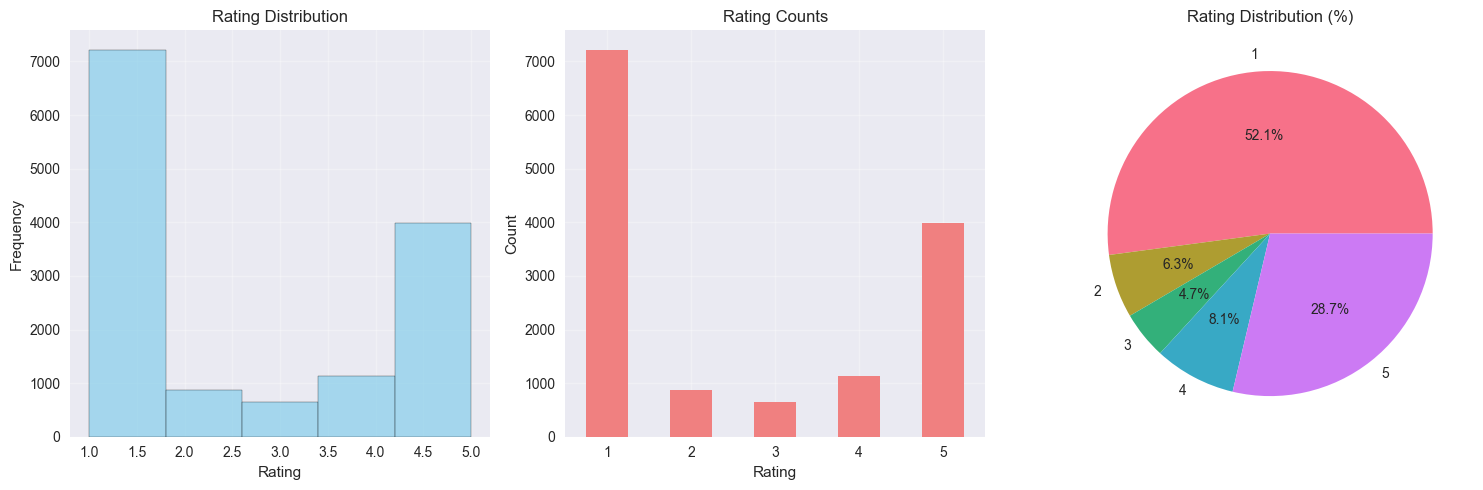

In [3]:
# =============================================================================
# Cell 3: Rating Distribution Analysis
# =============================================================================

print("="*50)
print("RATING DISTRIBUTION ANALYSIS")
print("="*50)

# Basic rating statistics
rating_stats = df['ReviewRating'].describe()
print("Rating Statistics:")
print(rating_stats)

# Rating distribution
plt.figure(figsize=(15, 5))

# Histogram
plt.subplot(1, 3, 1)
plt.hist(df['ReviewRating'], bins=5, alpha=0.7, color='skyblue', edgecolor='black')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Rating Distribution')
plt.grid(True, alpha=0.3)

# Bar plot
plt.subplot(1, 3, 2)
rating_counts = df['ReviewRating'].value_counts().sort_index()
rating_counts.plot(kind='bar', color='lightcoral')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Rating Counts')
plt.xticks(rotation=0)
plt.grid(True, alpha=0.3)

# Pie chart
plt.subplot(1, 3, 3)
rating_counts.plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette("husl", len(rating_counts)))
plt.title('Rating Distribution (%)')
plt.ylabel('')

plt.tight_layout()
plt.show()


TEMPORAL ANALYSIS


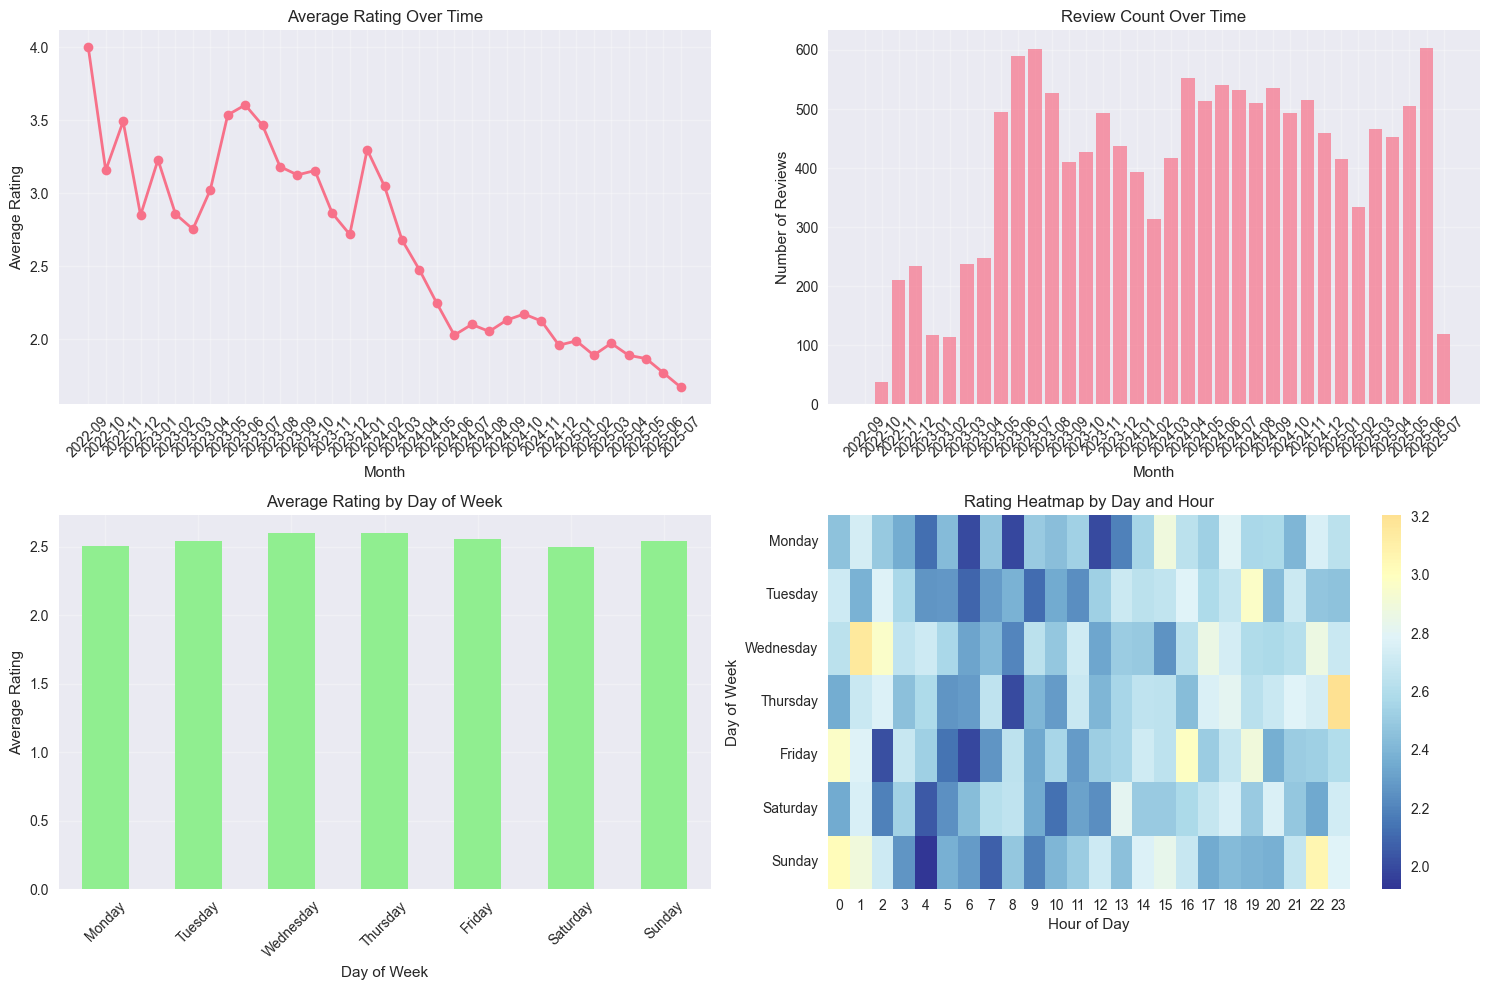

In [4]:
# =============================================================================
# Cell 4: Temporal Analysis
# =============================================================================

print("\n" + "="*50)
print("TEMPORAL ANALYSIS")
print("="*50)

# Convert date column
df['ReviewDate'] = pd.to_datetime(df['ReviewDate'])
df['ReviewMonth'] = df['ReviewDate'].dt.to_period('M')
df['ReviewDay'] = df['ReviewDate'].dt.day_name()

# Monthly trend
monthly_ratings = df.groupby('ReviewMonth')['ReviewRating'].agg(['mean', 'count']).reset_index()
monthly_ratings['ReviewMonth'] = monthly_ratings['ReviewMonth'].astype(str)

plt.figure(figsize=(15, 10))

# Monthly average rating
plt.subplot(2, 2, 1)
plt.plot(monthly_ratings['ReviewMonth'], monthly_ratings['mean'], marker='o', linewidth=2)
plt.xlabel('Month')
plt.ylabel('Average Rating')
plt.title('Average Rating Over Time')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

# Monthly review count
plt.subplot(2, 2, 2)
plt.bar(monthly_ratings['ReviewMonth'], monthly_ratings['count'], alpha=0.7)
plt.xlabel('Month')
plt.ylabel('Number of Reviews')
plt.title('Review Count Over Time')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

# Day of week analysis
daily_ratings = df.groupby('ReviewDay')['ReviewRating'].agg(['mean', 'count'])
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_ratings = daily_ratings.reindex(day_order)

plt.subplot(2, 2, 3)
daily_ratings['mean'].plot(kind='bar', color='lightgreen')
plt.xlabel('Day of Week')
plt.ylabel('Average Rating')
plt.title('Average Rating by Day of Week')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

# Rating heatmap by day and hour
df['ReviewHour'] = df['ReviewDate'].dt.hour
rating_heatmap = df.groupby(['ReviewDay', 'ReviewHour'])['ReviewRating'].mean().unstack()
rating_heatmap = rating_heatmap.reindex(day_order)

plt.subplot(2, 2, 4)
sns.heatmap(rating_heatmap, cmap='RdYlBu_r', center=3, annot=False)
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')
plt.title('Rating Heatmap by Day and Hour')

plt.tight_layout()
plt.show()


GEOGRAPHIC ANALYSIS
Top 10 Countries by Average Rating:
    UserCountry      mean  count
38           FI  3.296296     27
28           CY  3.190476     21
79           MX  3.090909     11
50           IE  2.958678    242
39           FR  2.732143     56
112          US  2.670250   3442
84           NZ  2.669643    224
40           GB  2.659546   6647
56           IT  2.628571     35
30           DE  2.611111    108


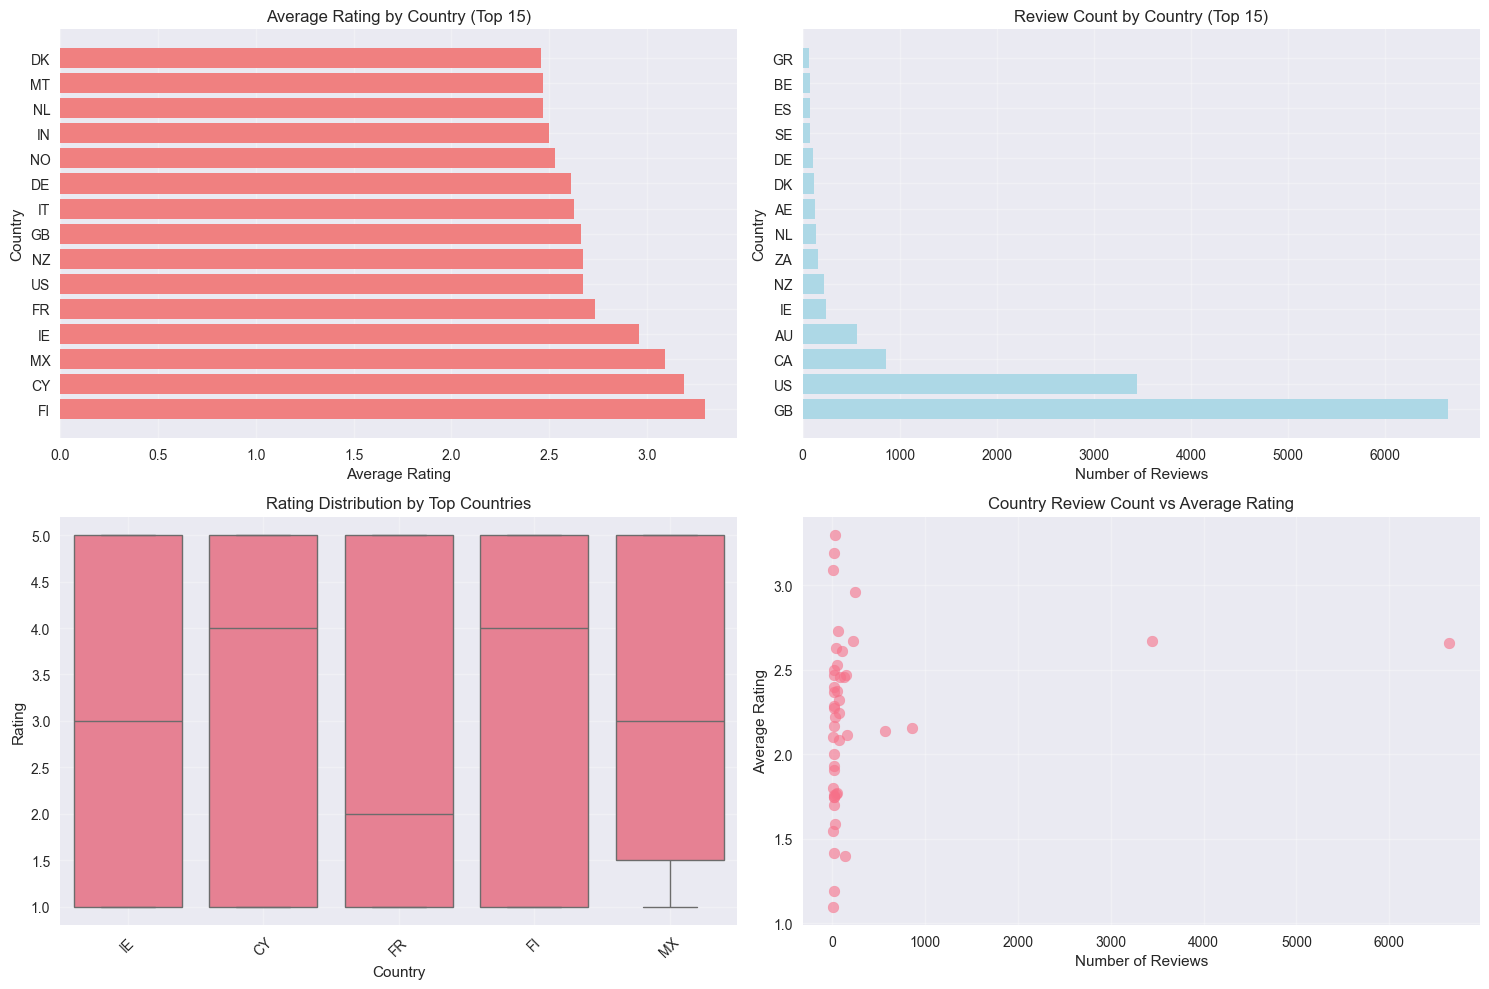

In [5]:
# =============================================================================
# Cell 5: Geographic Analysis
# =============================================================================

print("\n" + "="*50)
print("GEOGRAPHIC ANALYSIS")
print("="*50)

# Country analysis
country_stats = df.groupby('UserCountry')['ReviewRating'].agg(['mean', 'count']).reset_index()
country_stats = country_stats[country_stats['count'] >= 10]  # Filter countries with at least 10 reviews
country_stats = country_stats.sort_values('mean', ascending=False)

print("Top 10 Countries by Average Rating:")
print(country_stats.head(10))

plt.figure(figsize=(15, 10))

# Average rating by country
plt.subplot(2, 2, 1)
top_countries = country_stats.head(15)
plt.barh(top_countries['UserCountry'], top_countries['mean'], color='lightcoral')
plt.xlabel('Average Rating')
plt.ylabel('Country')
plt.title('Average Rating by Country (Top 15)')
plt.grid(True, alpha=0.3)

# Review count by country
plt.subplot(2, 2, 2)
top_countries_count = country_stats.nlargest(15, 'count')
plt.barh(top_countries_count['UserCountry'], top_countries_count['count'], color='lightblue')
plt.xlabel('Number of Reviews')
plt.ylabel('Country')
plt.title('Review Count by Country (Top 15)')
plt.grid(True, alpha=0.3)

# Rating distribution by top countries
plt.subplot(2, 2, 3)
top_5_countries = country_stats.head(5)['UserCountry'].tolist()
df_top_countries = df[df['UserCountry'].isin(top_5_countries)]
sns.boxplot(data=df_top_countries, x='UserCountry', y='ReviewRating')
plt.xlabel('Country')
plt.ylabel('Rating')
plt.title('Rating Distribution by Top Countries')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

# Scatter plot: count vs average rating
plt.subplot(2, 2, 4)
plt.scatter(country_stats['count'], country_stats['mean'], alpha=0.6, s=60)
plt.xlabel('Number of Reviews')
plt.ylabel('Average Rating')
plt.title('Country Review Count vs Average Rating')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()



REVIEW TEXT ANALYSIS
Text Length Statistics:
count    13725.000000
mean       454.939016
std        468.729514
min         12.000000
25%        187.000000
50%        323.000000
75%        545.000000
max       4990.000000
Name: ReviewLength, dtype: float64

Word Count Statistics:
count    13725.000000
mean        83.316357
std         84.911685
min          2.000000
25%         34.000000
50%         59.000000
75%        100.000000
max       1014.000000
Name: WordCount, dtype: float64


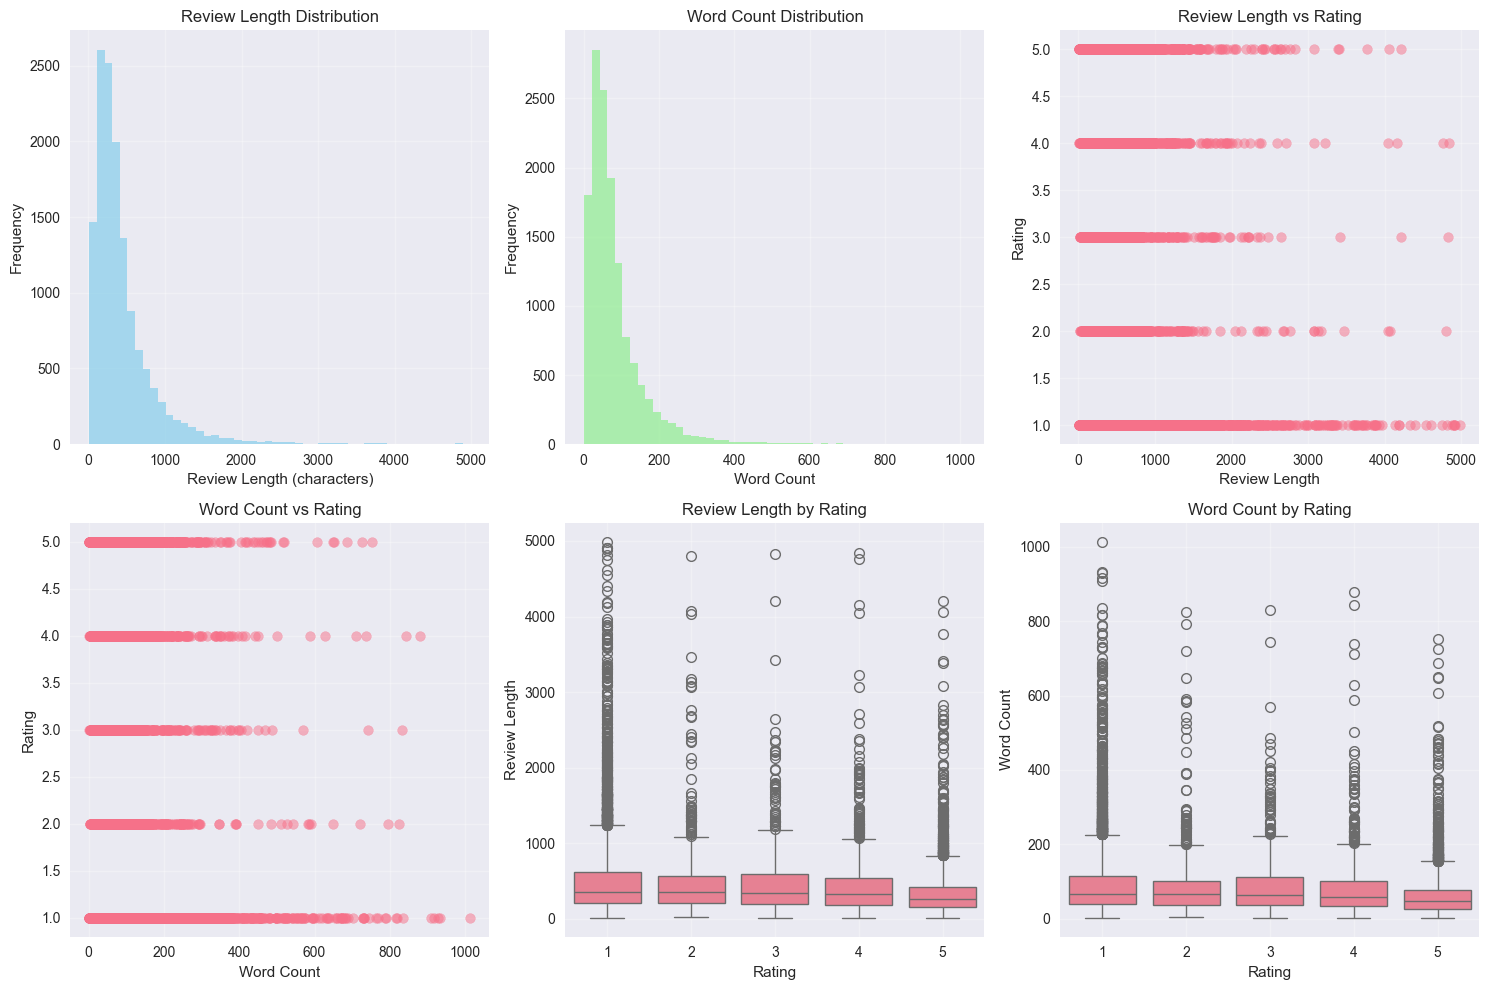

In [6]:
# =============================================================================
# Cell 6: Review Text Analysis
# =============================================================================

print("\n" + "="*50)
print("REVIEW TEXT ANALYSIS")
print("="*50)

# Text length analysis
df['ReviewLength'] = df['ReviewText'].str.len()
df['WordCount'] = df['ReviewText'].str.split().str.len()

# Text length statistics
print("Text Length Statistics:")
print(df['ReviewLength'].describe())

print("\nWord Count Statistics:")
print(df['WordCount'].describe())

plt.figure(figsize=(15, 10))

# Review length distribution
plt.subplot(2, 3, 1)
plt.hist(df['ReviewLength'], bins=50, alpha=0.7, color='skyblue')
plt.xlabel('Review Length (characters)')
plt.ylabel('Frequency')
plt.title('Review Length Distribution')
plt.grid(True, alpha=0.3)

# Word count distribution
plt.subplot(2, 3, 2)
plt.hist(df['WordCount'], bins=50, alpha=0.7, color='lightgreen')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.title('Word Count Distribution')
plt.grid(True, alpha=0.3)

# Length vs Rating
plt.subplot(2, 3, 3)
plt.scatter(df['ReviewLength'], df['ReviewRating'], alpha=0.5)
plt.xlabel('Review Length')
plt.ylabel('Rating')
plt.title('Review Length vs Rating')
plt.grid(True, alpha=0.3)

# Word count vs Rating
plt.subplot(2, 3, 4)
plt.scatter(df['WordCount'], df['ReviewRating'], alpha=0.5)
plt.xlabel('Word Count')
plt.ylabel('Rating')
plt.title('Word Count vs Rating')
plt.grid(True, alpha=0.3)

# Length by rating category
plt.subplot(2, 3, 5)
sns.boxplot(data=df, x='ReviewRating', y='ReviewLength')
plt.xlabel('Rating')
plt.ylabel('Review Length')
plt.title('Review Length by Rating')
plt.grid(True, alpha=0.3)

# Word count by rating category
plt.subplot(2, 3, 6)
sns.boxplot(data=df, x='ReviewRating', y='WordCount')
plt.xlabel('Rating')
plt.ylabel('Word Count')
plt.title('Word Count by Rating')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()



SENTIMENT ANALYSIS VISUALIZATION


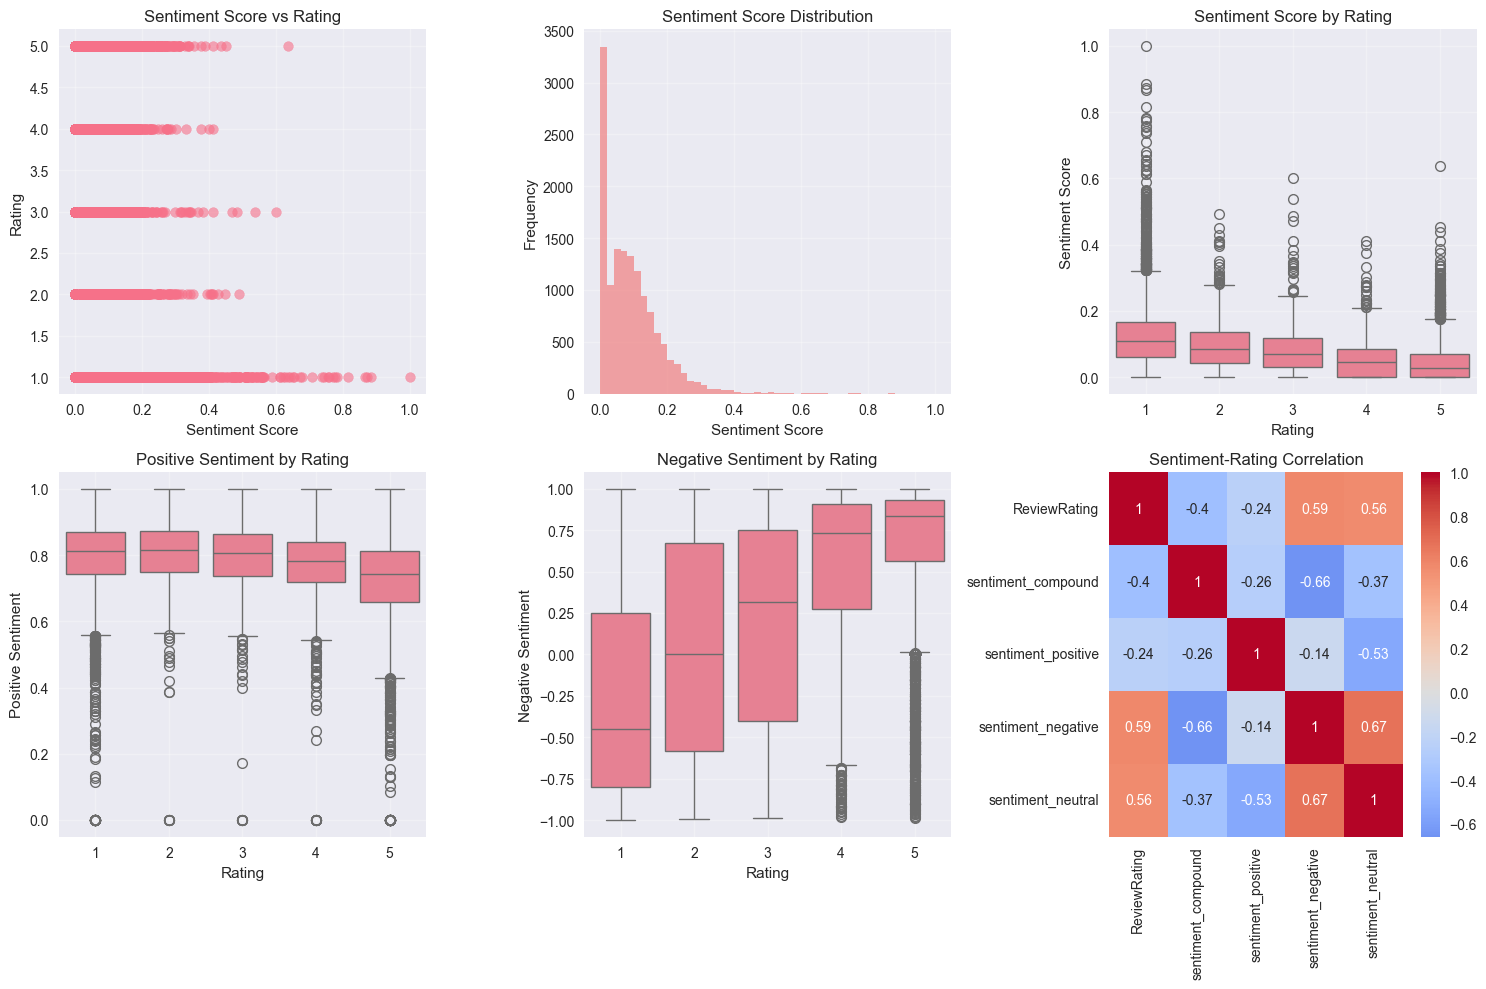

In [8]:
# =============================================================================
# Cell 7: Sentiment Analysis Visualization
# =============================================================================

print("\n" + "="*50)
print("SENTIMENT ANALYSIS VISUALIZATION")
print("="*50)

# Load sentiment data if available
if 'sentiment_scores' in processed_data:
    sentiment_df = pd.DataFrame(processed_data['sentiment_scores'])
    df_with_sentiment = df.copy()
    df_with_sentiment['sentiment_compound'] = sentiment_df['sentiment_compound']
    df_with_sentiment['sentiment_positive'] = sentiment_df['sentiment_pos']
    df_with_sentiment['sentiment_negative'] = sentiment_df['sentiment_neg']
    df_with_sentiment['sentiment_neutral'] = sentiment_df['sentiment_neu']
    
    plt.figure(figsize=(15, 10))
    
    # Sentiment vs Rating scatter
    plt.subplot(2, 3, 1)
    plt.scatter(df_with_sentiment['sentiment_compound'], df_with_sentiment['ReviewRating'], alpha=0.6)
    plt.xlabel('Sentiment Score')
    plt.ylabel('Rating')
    plt.title('Sentiment Score vs Rating')
    plt.grid(True, alpha=0.3)
    
    # Sentiment distribution
    plt.subplot(2, 3, 2)
    plt.hist(df_with_sentiment['sentiment_compound'], bins=50, alpha=0.7, color='lightcoral')
    plt.xlabel('Sentiment Score')
    plt.ylabel('Frequency')
    plt.title('Sentiment Score Distribution')
    plt.grid(True, alpha=0.3)
    
    # Sentiment by rating
    plt.subplot(2, 3, 3)
    sns.boxplot(data=df_with_sentiment, x='ReviewRating', y='sentiment_compound')
    plt.xlabel('Rating')
    plt.ylabel('Sentiment Score')
    plt.title('Sentiment Score by Rating')
    plt.grid(True, alpha=0.3)
    
    # Positive sentiment by rating
    plt.subplot(2, 3, 4)
    sns.boxplot(data=df_with_sentiment, x='ReviewRating', y='sentiment_positive')
    plt.xlabel('Rating')
    plt.ylabel('Positive Sentiment')
    plt.title('Positive Sentiment by Rating')
    plt.grid(True, alpha=0.3)
    
    # Negative sentiment by rating
    plt.subplot(2, 3, 5)
    sns.boxplot(data=df_with_sentiment, x='ReviewRating', y='sentiment_negative')
    plt.xlabel('Rating')
    plt.ylabel('Negative Sentiment')
    plt.title('Negative Sentiment by Rating')
    plt.grid(True, alpha=0.3)
    
    # Correlation heatmap
    plt.subplot(2, 3, 6)
    sentiment_corr = df_with_sentiment[['ReviewRating', 'sentiment_compound', 
                                       'sentiment_positive', 'sentiment_negative', 
                                       'sentiment_neutral']].corr()
    sns.heatmap(sentiment_corr, annot=True, cmap='coolwarm', center=0)
    plt.title('Sentiment-Rating Correlation')
    
    plt.tight_layout()
    plt.show()
    
else:
    print("Sentiment analysis data not available")
    print("Please run feature engineering first to generate sentiment scores")


WORD CLOUD GENERATION


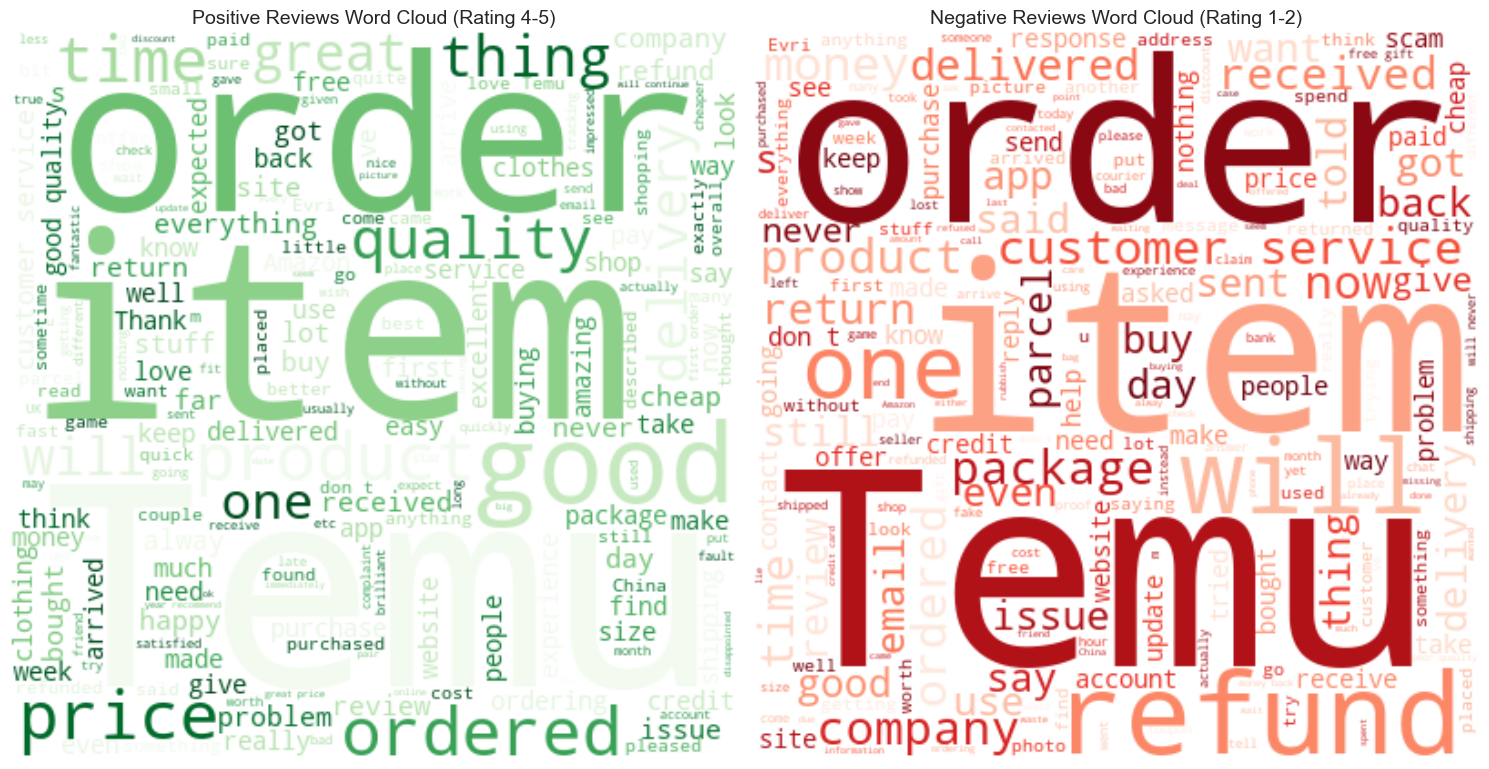

In [9]:
# =============================================================================
# Cell 8: Word Cloud Generation
# =============================================================================

print("\n" + "="*50)
print("WORD CLOUD GENERATION")
print("="*50)

# Separate positive and negative reviews
positive_reviews = df[df['ReviewRating'] >= 4]['ReviewText'].str.cat(sep=' ')
negative_reviews = df[df['ReviewRating'] <= 2]['ReviewText'].str.cat(sep=' ')

# Generate word clouds
plt.figure(figsize=(15, 8))

# Positive reviews word cloud
plt.subplot(1, 2, 1)
if positive_reviews:
    wordcloud_positive = WordCloud(width=400, height=400, 
                                 background_color='white',
                                 colormap='Greens').generate(positive_reviews)
    plt.imshow(wordcloud_positive, interpolation='bilinear')
    plt.axis('off')
    plt.title('Positive Reviews Word Cloud (Rating 4-5)', fontsize=14)
else:
    plt.text(0.5, 0.5, 'No positive reviews found', ha='center', va='center')
    plt.axis('off')
    plt.title('Positive Reviews Word Cloud (Rating 4-5)', fontsize=14)

# Negative reviews word cloud
plt.subplot(1, 2, 2)
if negative_reviews:
    wordcloud_negative = WordCloud(width=400, height=400, 
                                 background_color='white',
                                 colormap='Reds').generate(negative_reviews)
    plt.imshow(wordcloud_negative, interpolation='bilinear')
    plt.axis('off')
    plt.title('Negative Reviews Word Cloud (Rating 1-2)', fontsize=14)
else:
    plt.text(0.5, 0.5, 'No negative reviews found', ha='center', va='center')
    plt.axis('off')
    plt.title('Negative Reviews Word Cloud (Rating 1-2)', fontsize=14)

plt.tight_layout()
plt.show()


MODEL PERFORMANCE VISUALIZATION


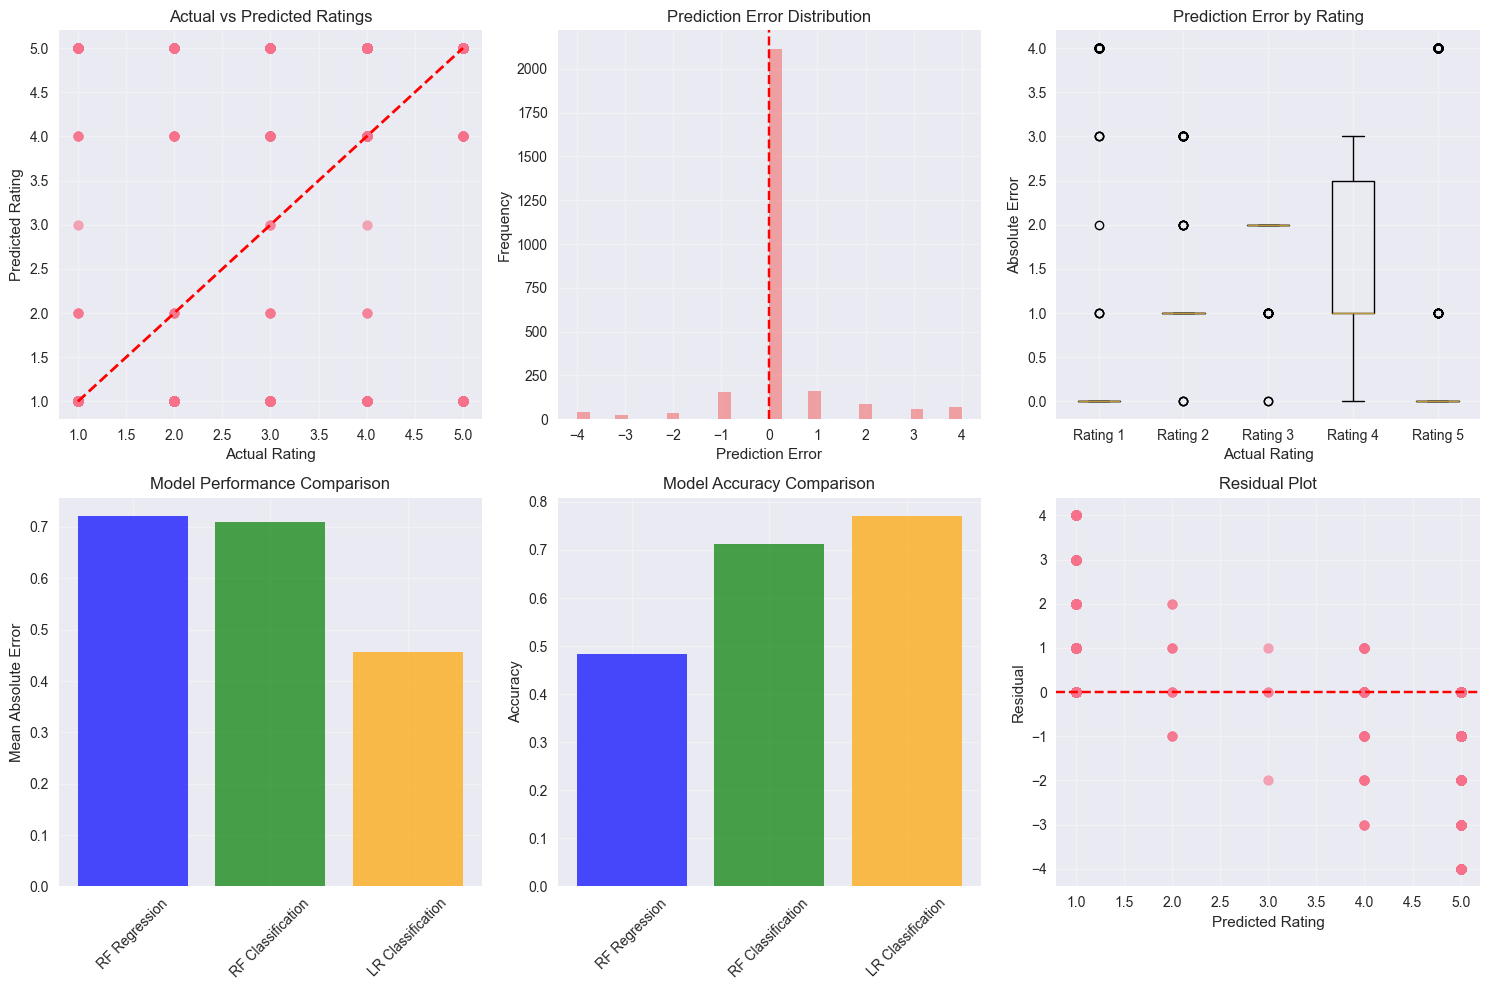

In [10]:
# =============================================================================
# Cell 9: Model Performance Visualization
# =============================================================================

print("\n" + "="*50)
print("MODEL PERFORMANCE VISUALIZATION")
print("="*50)

# Load model predictions
final_predictions = evaluation_results['final_predictions']
actual_values = evaluation_results['actual_values']

plt.figure(figsize=(15, 10))

# Actual vs Predicted scatter plot
plt.subplot(2, 3, 1)
plt.scatter(actual_values, final_predictions, alpha=0.6)
plt.plot([1, 5], [1, 5], 'r--', lw=2)
plt.xlabel('Actual Rating')
plt.ylabel('Predicted Rating')
plt.title('Actual vs Predicted Ratings')
plt.grid(True, alpha=0.3)

# Prediction error histogram
plt.subplot(2, 3, 2)
errors = actual_values - final_predictions
plt.hist(errors, bins=30, alpha=0.7, color='lightcoral')
plt.xlabel('Prediction Error')
plt.ylabel('Frequency')
plt.title('Prediction Error Distribution')
plt.axvline(x=0, color='red', linestyle='--')
plt.grid(True, alpha=0.3)

# Error by actual rating
plt.subplot(2, 3, 3)
error_by_rating = []
ratings = sorted(actual_values.unique())
for rating in ratings:
    rating_errors = np.abs(errors[actual_values == rating])
    error_by_rating.append(rating_errors)

plt.boxplot(error_by_rating, labels=[f'Rating {int(r)}' for r in ratings])
plt.xlabel('Actual Rating')
plt.ylabel('Absolute Error')
plt.title('Prediction Error by Rating')
plt.grid(True, alpha=0.3)

# Model comparison
plt.subplot(2, 3, 4)
model_names = ['RF Regression', 'RF Classification', 'LR Classification']
mae_values = [evaluation_results['regression_mae'], 
              evaluation_results['rf_classification_mae'],
              evaluation_results['lr_classification_mae']]
plt.bar(model_names, mae_values, color=['blue', 'green', 'orange'], alpha=0.7)
plt.ylabel('Mean Absolute Error')
plt.title('Model Performance Comparison')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

# Accuracy comparison
plt.subplot(2, 3, 5)
accuracy_values = [evaluation_results['regression_accuracy'],
                   evaluation_results['rf_classification_accuracy'],
                   evaluation_results['lr_classification_accuracy']]
plt.bar(model_names, accuracy_values, color=['blue', 'green', 'orange'], alpha=0.7)
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

# Residual plot
plt.subplot(2, 3, 6)
plt.scatter(final_predictions, errors, alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Rating')
plt.ylabel('Residual')
plt.title('Residual Plot')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [11]:
# =============================================================================
# Cell 10: Interactive Plotly Visualizations 
# =============================================================================

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.io as pio

print("\n" + "="*50)
print("INTERACTIVE PLOTLY VISUALIZATIONS")
print("="*50)

pio.renderers.default = "browser"

# Create interactive rating distribution
fig_rating = px.histogram(df, x='ReviewRating', nbins=5, 
                         title='Interactive Rating Distribution',
                         labels={'ReviewRating': 'Rating', 'count': 'Frequency'})
fig_rating.update_layout(bargap=0.1)


fig_rating.show()

# Create interactive temporal analysis
monthly_data = df.groupby(df['ReviewDate'].dt.to_period('M'))['ReviewRating'].agg(['mean', 'count']).reset_index()
monthly_data['ReviewDate'] = monthly_data['ReviewDate'].astype(str)

fig_temporal = make_subplots(
    rows=2, cols=1,
    subplot_titles=('Average Rating Over Time', 'Review Count Over Time'),
    specs=[[{"secondary_y": False}], [{"secondary_y": False}]]
)

fig_temporal.add_trace(
    go.Scatter(x=monthly_data['ReviewDate'], y=monthly_data['mean'], 
               mode='lines+markers', name='Average Rating'),
    row=1, col=1
)

fig_temporal.add_trace(
    go.Bar(x=monthly_data['ReviewDate'], y=monthly_data['count'], 
           name='Review Count'),
    row=2, col=1
)

fig_temporal.update_layout(height=600, title_text="Temporal Analysis")
fig_temporal.show()

# Create interactive country analysis
country_data = df.groupby('UserCountry')['ReviewRating'].agg(['mean', 'count']).reset_index()
country_data = country_data[country_data['count'] >= 10]

fig_country = px.scatter(country_data, x='count', y='mean', 
                        hover_data=['UserCountry'],
                        title='Country Analysis: Review Count vs Average Rating',
                        labels={'count': 'Number of Reviews', 'mean': 'Average Rating'})
fig_country.show()


INTERACTIVE PLOTLY VISUALIZATIONS


In [12]:
# =============================================================================
# Cell 11: Dashboard Summary Statistics
# =============================================================================

print("\n" + "="*60)
print("DASHBOARD SUMMARY STATISTICS")
print("="*60)

# Create comprehensive summary
summary_stats = {
    'Total Reviews': len(df),
    'Average Rating': df['ReviewRating'].mean(),
    'Rating Standard Deviation': df['ReviewRating'].std(),
    'Most Common Rating': df['ReviewRating'].mode().iloc[0],
    'Unique Countries': df['UserCountry'].nunique(),
    'Date Range': f"{df['ReviewDate'].min().date()} to {df['ReviewDate'].max().date()}",
    'Average Review Length': df['ReviewLength'].mean(),
    'Average Word Count': df['WordCount'].mean(),
    'Model Performance (MAE)': evaluation_results['final_model_mae'],
    'Model Accuracy': evaluation_results['final_model_accuracy']
}

print("Key Performance Indicators:")
print("-" * 40)
for key, value in summary_stats.items():
    if isinstance(value, float):
        print(f"{key:.<30} {value:.3f}")
    else:
        print(f"{key:.<30} {value}")

# Rating distribution summary
print(f"\nRating Distribution:")
print("-" * 20)
rating_dist = df['ReviewRating'].value_counts().sort_index()
for rating, count in rating_dist.items():
    percentage = (count / len(df)) * 100
    print(f"Rating {int(rating)}: {count:,} ({percentage:.1f}%)")

# Top countries summary
print(f"\nTop 5 Countries by Review Count:")
print("-" * 35)
top_countries = df['UserCountry'].value_counts().head()
for country, count in top_countries.items():
    percentage = (count / len(df)) * 100
    print(f"{country}: {count:,} ({percentage:.1f}%)")


DASHBOARD SUMMARY STATISTICS
Key Performance Indicators:
----------------------------------------
Total Reviews................. 13855
Average Rating................ 2.550
Rating Standard Deviation..... 1.782
Most Common Rating............ 1
Unique Countries.............. 117
Date Range.................... 2022-09-30 to 2025-07-07
Average Review Length......... 454.939
Average Word Count............ 83.316
Model Performance (MAE)....... 0.456
Model Accuracy................ 0.770

Rating Distribution:
--------------------
Rating 1: 7,219 (52.1%)
Rating 2: 878 (6.3%)
Rating 3: 655 (4.7%)
Rating 4: 1,125 (8.1%)
Rating 5: 3,978 (28.7%)

Top 5 Countries by Review Count:
-----------------------------------
GB: 6,647 (48.0%)
US: 3,442 (24.8%)
CA: 856 (6.2%)
AU: 563 (4.1%)
IE: 242 (1.7%)


In [13]:
# =============================================================================
# Cell 12: Export Visualizations and Data
# =============================================================================

print("\n" + "="*50)
print("EXPORT VISUALIZATIONS AND DATA")
print("="*50)

# Create output directory
import os
os.makedirs('../src/visualization', exist_ok=True)

# Export summary statistics
summary_df = pd.DataFrame(list(summary_stats.items()), 
                         columns=['Metric', 'Value'])
summary_df.to_csv('../src/visualization/summary_statistics.csv', index=False)

# Export rating distribution
rating_dist_df = pd.DataFrame({
    'Rating': rating_dist.index,
    'Count': rating_dist.values,
    'Percentage': (rating_dist.values / len(df)) * 100
})
rating_dist_df.to_csv('../src/visualization/rating_distribution.csv', index=False)

# Export country analysis
country_analysis = df.groupby('UserCountry')['ReviewRating'].agg(['mean', 'count', 'std']).reset_index()
country_analysis.to_csv('../src/visualization/country_analysis.csv', index=False)

# Export temporal analysis
temporal_analysis = df.groupby(df['ReviewDate'].dt.date)['ReviewRating'].agg(['mean', 'count']).reset_index()
temporal_analysis.to_csv('../src/visualization/temporal_analysis.csv', index=False)

print("Visualizations and data exported successfully!")
print("Files saved in '../src/visualization/' directory:")
print("- summary_statistics.csv")
print("- rating_distribution.csv") 
print("- country_analysis.csv")
print("- temporal_analysis.csv")


EXPORT VISUALIZATIONS AND DATA
Visualizations and data exported successfully!
Files saved in '../src/visualization/' directory:
- summary_statistics.csv
- rating_distribution.csv
- country_analysis.csv
- temporal_analysis.csv
